# 3D Perceptron

Final weights: [[0.71990087 0.0897457  0.42140097]]
Final bias: [-1.099505]


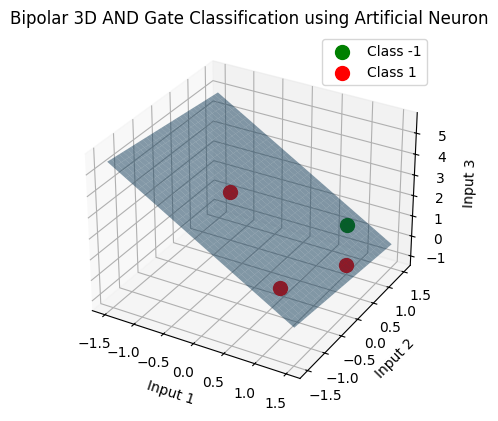

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define input patterns (Bipolar 3-input AND gate for 4 cases)
X = np.array([[1, 1, 1], [1, 1, -1], [1, -1, 1], [-1, 1, 1]]).T  # 3x4 matrix (B)
T = np.array([1, -1, -1, -1])  # Target outputs (Bipolar AND logic)

# Initialize weights and bias
W = np.random.randn(1, 3)  # Random small weights
b = np.random.randn(1)     # Random bias

# Learning rate and epochs
alpha = 0.1  # Learning rate
epochs = 100  # Number of iterations

# Training loop (Perceptron Learning Rule)
for epoch in range(epochs):
    for i in range(X.shape[1]):
        # Compute output
        net = W @ X[:, i] + b
        y = np.sign(net)  # Bipolar step activation function
        
        # Update rule
        e = T[i] - y
        W += alpha * e * X[:, i].reshape(1, -1)
        b += alpha * e

# Display final weights and bias
print('Final weights:', W)
print('Final bias:', b)

# Plotting the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the input points with their targets
for i in range(len(T)):
    if T[i] == -1:
        ax.scatter(X[0, i], X[1, i], X[2, i], color='r', s=100)  # Class -1
    else:
        ax.scatter(X[0, i], X[1, i], X[2, i], color='g', s=100)  # Class 1

# Plot decision boundary
x_vals, y_vals = np.meshgrid(np.arange(-1.5, 1.6, 0.1), np.arange(-1.5, 1.6, 0.1))
z_vals = -(W[0, 0] * x_vals + W[0, 1] * y_vals + b) / W[0, 2]  # Decision boundary equation

ax.plot_surface(x_vals, y_vals, z_vals, alpha=0.5, edgecolor='none')

ax.set_xlabel('Input 1')
ax.set_ylabel('Input 2')
ax.set_zlabel('Input 3')
ax.set_title('Bipolar 3D AND Gate Classification using Artificial Neuron')

plt.grid(True)
plt.legend(['Class -1', 'Class 1'])
plt.show()
